**FAUZAN ADRIVANO SETIONO (202010370311312)**

# Library

In [ ]:
import json
import pandas as pd
import os
import numpy as np
import nltk
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import seaborn as sns

from wordcloud import WordCloud
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from keras.applications import VGG19
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

# Load Dataset

**Citra**

In [ ]:
citra_path = "/content/drive/MyDrive/KULIAH/Semester 7/Praktikum/dataset/rps"

In [ ]:
print(f"Isi dari folder {citra_path}:")
folder_contents = os.listdir(citra_path)
for item in folder_contents:
    print(item)

Isi dari folder /content/drive/MyDrive/KULIAH/Semester 7/Praktikum/dataset/rps:
rock
scissors
paper


# Citra

**Splitting Dataset**

In [ ]:
dataset_folder_path  = '/content/drive/MyDrive/KULIAH/Semester 7/Praktikum/dataset/rps'
hasil_splitting = '/content/drive/MyDrive/KULIAH/Semester 7/Praktikum/dataset/dataset_split'

In [ ]:
classes = os.listdir(dataset_folder_path)
classes

['rock', 'scissors', 'paper']

In [ ]:
splitfolders.ratio(dataset_folder_path,
                   output=hasil_splitting,
                   ratio=(0.75, 0.15, 0.10),
                   group_prefix=None)

Copying files: 2520 files [00:52, 47.60 files/s] 


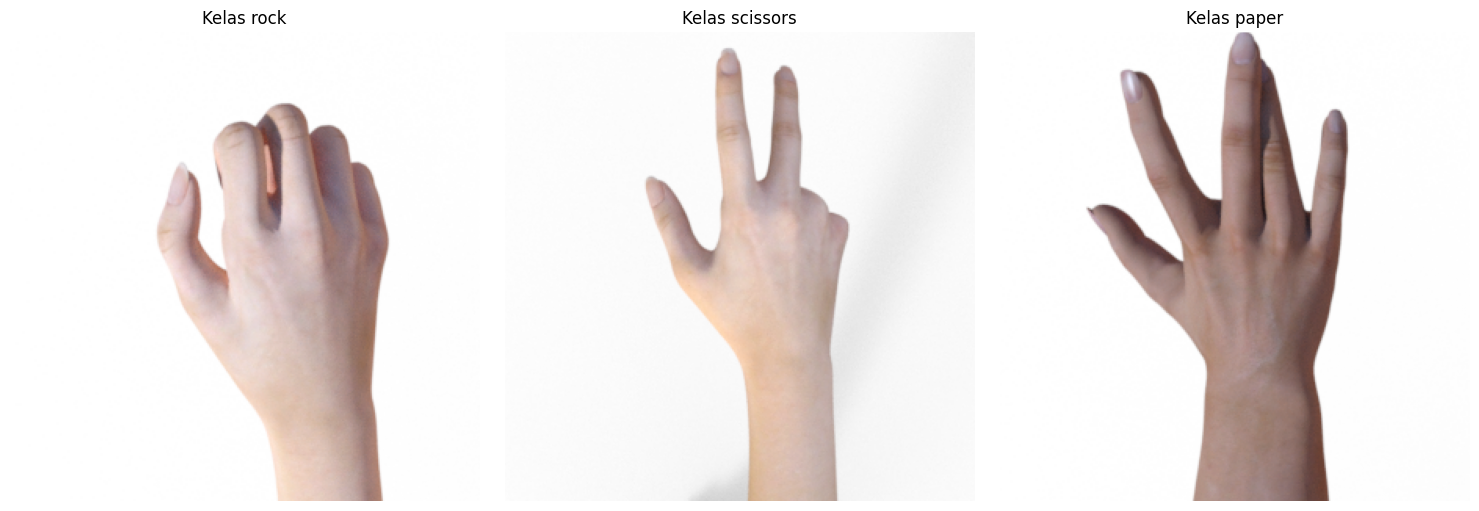

In [ ]:
kelas = ['rock', 'scissors', 'paper']

fig, axes = plt.subplots(1, len(kelas), figsize=(15, 5))

for idx, k in enumerate(kelas):
    subfolder_path = os.path.join(citra_path, k)
    files = os.listdir(subfolder_path)
    img_path = os.path.join(subfolder_path, files[0])
    img = mpimg.imread(img_path)

    axes[idx].imshow(img)
    axes[idx].set_title(f'Kelas {k}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

**Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=30,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

In [ ]:
datagen_test = ImageDataGenerator(
          rescale=1./255,
      )

In [ ]:
train_path = '/content/drive/MyDrive/KULIAH/Semester 7/Praktikum/dataset/dataset_split/train'

In [ ]:
val_path = '/content/drive/MyDrive/KULIAH/Semester 7/Praktikum/dataset/dataset_split/val'

In [ ]:
test_path = '/content/drive/MyDrive/KULIAH/Semester 7/Praktikum/dataset/dataset_split/test'

In [ ]:
train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True)

Found 1890 images belonging to 3 classes.


In [ ]:
val_gen = datagen.flow_from_directory(val_path,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True)

Found 378 images belonging to 3 classes.


In [ ]:
test_gen = datagen_test.flow_from_directory(test_path,
                                        target_size=(224, 224),
                                        batch_size=64,
                                        class_mode='categorical',
                                        shuffle=False)

Found 252 images belonging to 3 classes.


**MODEL**

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 5

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=num_epochs,
    validation_data=val_gen,
    validation_steps=len(val_gen)
)

Epoch 1/5
60/60 [==============================] - 50s 761ms/step - loss: 0.7483 - accuracy: 0.7063 - val_loss: 0.4030 - val_accuracy: 0.9762
Epoch 2/5
60/60 [==============================] - 42s 705ms/step - loss: 0.2893 - accuracy: 0.9598 - val_loss: 0.1856 - val_accuracy: 0.9788
Epoch 3/5
60/60 [==============================] - 40s 671ms/step - loss: 0.1784 - accuracy: 0.9608 - val_loss: 0.1318 - val_accuracy: 0.9709
Epoch 4/5
60/60 [==============================] - 42s 708ms/step - loss: 0.1027 - accuracy: 0.9831 - val_loss: 0.0708 - val_accuracy: 0.9921
Epoch 5/5
60/60 [==============================] - 40s 671ms/step - loss: 0.0746 - accuracy: 0.9857 - val_loss: 0.0637 - val_accuracy: 0.9868


In [ ]:
model.save('model_done.h5')

**EVALUASI**

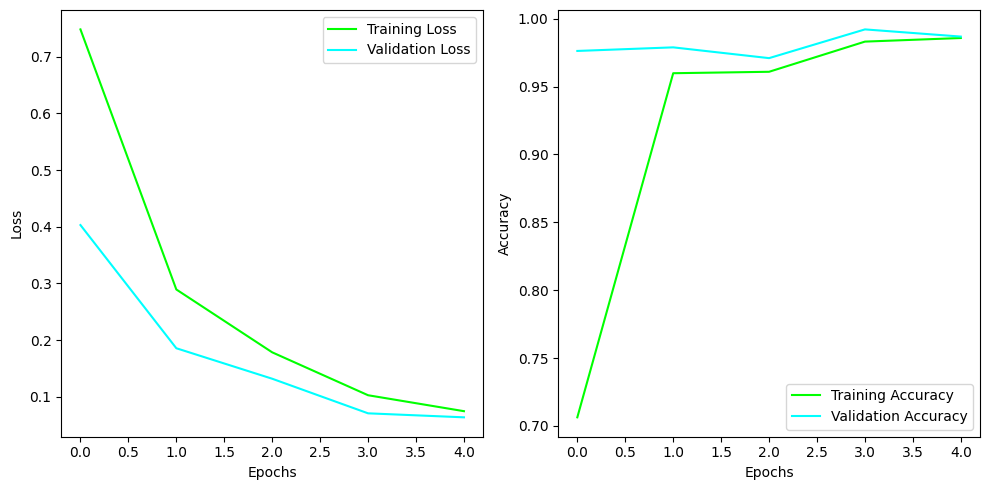

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='lime')
plt.plot(history.history['val_loss'], label='Validation Loss', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='lime')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Y_pred = model.predict(test_gen, steps=len(test_gen), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

loss_and_metrics = model.evaluate(test_gen, steps=len(test_gen), verbose=1)
print("Test Loss: ", loss_and_metrics[0])
print("Test Accuracy: ", loss_and_metrics[1])

4/4 [==============================] - 2s 358ms/step - loss: 0.0418 - accuracy: 0.9881
Test Loss:  0.0417792834341526
Test Accuracy:  0.988095223903656


**PREDIKSI**

In [ ]:
class_names = list(train_gen.class_indices)

1/1 [==============================] - 0s 19ms/step


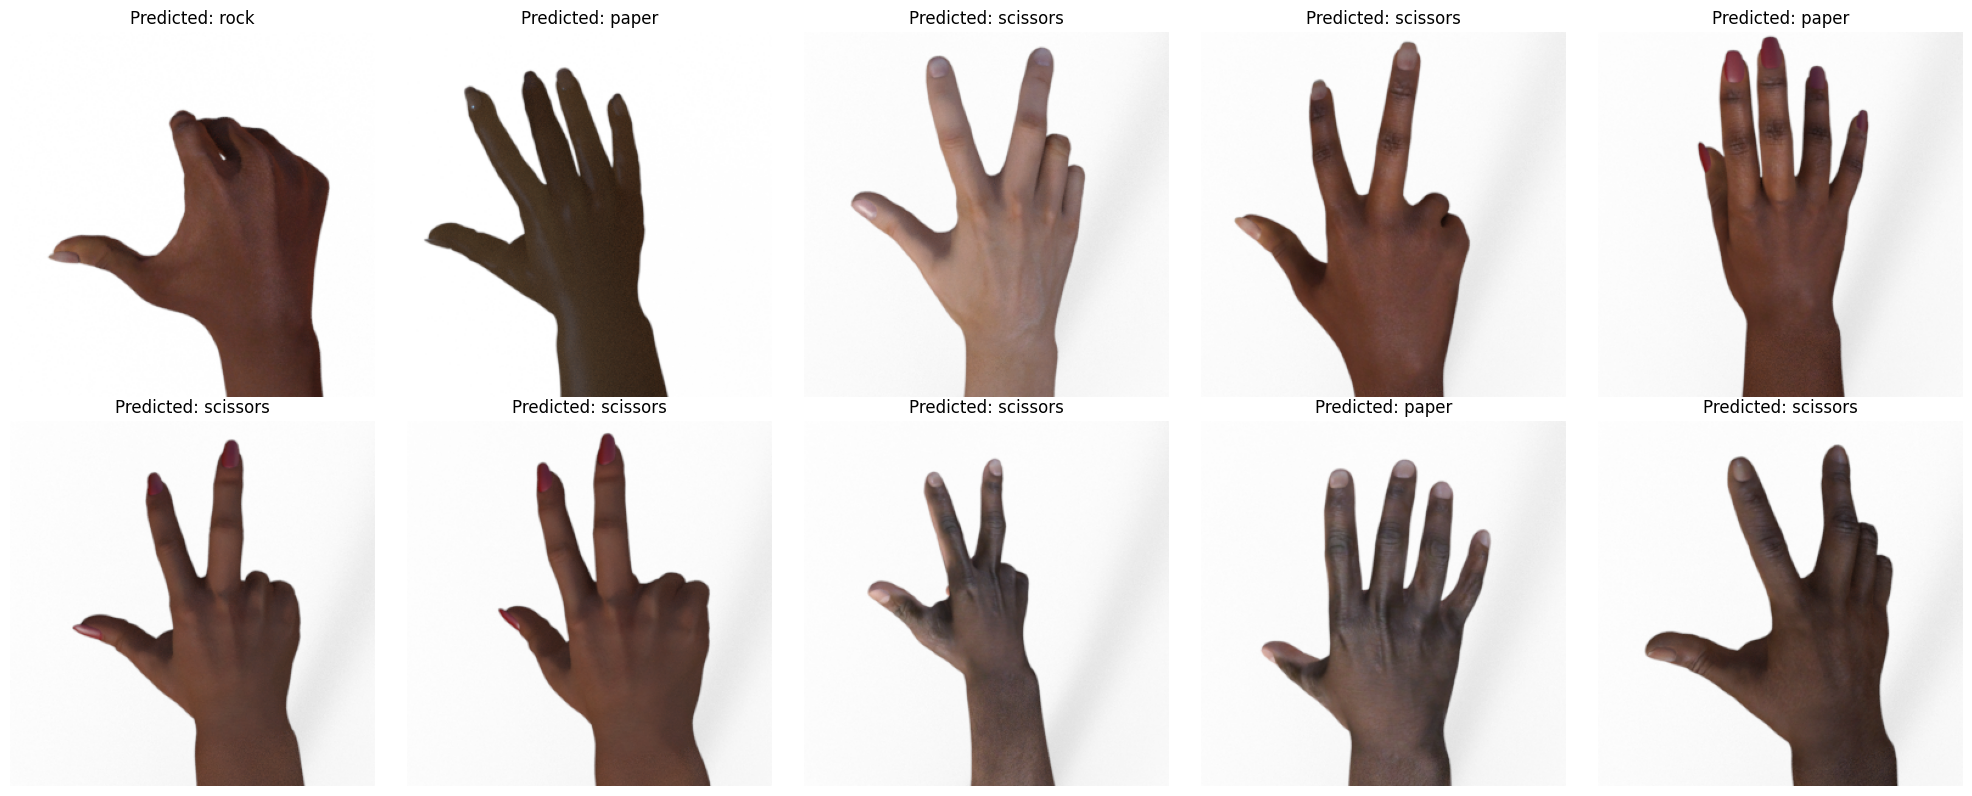

In [ ]:
random_indices = np.random.choice(len(test_gen.filenames), 10, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, index in enumerate(random_indices):
    row = i // 5
    col = i % 5

    image_path = test_gen.filepaths[index]
    img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = class_names[np.argmax(prediction)]

    ax = axes[row, col]
    ax.imshow(plt.imread(image_path))
    ax.set_title(f"Predicted: {predicted_class}")
    ax.axis("off")

plt.tight_layout()
plt.show()